# Importing Packages

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

### Reading the csv file

In [4]:
ss=pd.read_csv("C:/Users/Achintya.K/Desktop/sparks_internship/student_scores.csv")

In [7]:
ss.shape

(25, 2)

In [8]:
ss.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [9]:
ss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [10]:
ss.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


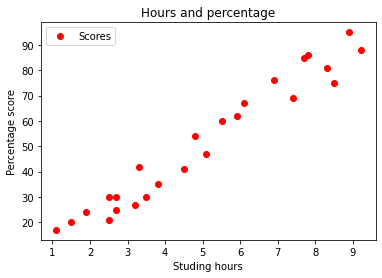

In [13]:
ss.plot(x='Hours', y='Scores',style='o',color='red')
plt.title('Hours and percentage')
plt.xlabel('Studing hours')
plt.ylabel('Percentage score')
plt.show()

### Splitting the dataset into test and train

In [93]:
X=ss.iloc[:,:-1].values
Y=ss.iloc[:,1].values

In [95]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=0)

### Training the model

In [96]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

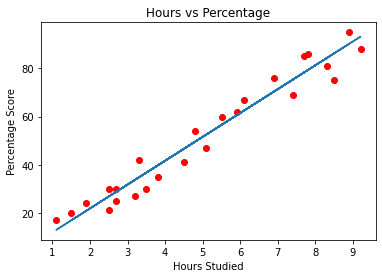

In [105]:
# Plotting the regression line
line = reg.coef_*X+reg.intercept_
# Plotting for the test data
plt.scatter(X, Y,color='red')
plt.plot(X, line);
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')
plt.show()

In [98]:
reg.intercept_

2.018160041434683

In [99]:
print(reg.coef_)

[9.91065648]


In [100]:
y_pred=reg.predict(X_test)

In [101]:
df=pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

In [102]:
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


### Evaluating the model

In [103]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665


#### You can see that the value of root mean squared error is 4.64, which is less than 10% of the mean value of the percentages of all the students i.e. 51.48. This means that our algorithm did a decent job.

## Predicting percentage for a stdent who studies for 9.25 hours a day

In [104]:
print('Score of student who studied for 9.25 hours a day', reg.predict([[9.25]]))

Score of student who studied for 9.25 hours a day [93.69173249]
